(unit4.8)=
# Unit 4.8: Computer-Aided Systems Analysis and Simulation

Follow along at [cpjobling.github.io/eg-150-textbook/laplace_transform/8/casas](https://cpjobling.github.io/eg-150-textbook/laplace_transform/8/casas)

![QR Code for this lecture](pictures/qrcode_lap8.png)

## Agenda

We conclude our introduction to the applications of the Laplace transform by demonstrating the facilties provided by the *Control Systems Toolbox* and the simulation tool *Simulink*. We will repeat {ref}`ex:14.2` using these tools and we will conclude by exploring some of the problems you have studied in **EG-152 Analogue Design** hopefully confirming some of the results you have obbserved in that lab.

* {ref}`circ_tf`
* {ref}`matlab_tf`
* {ref}`simulink_tf`
* {ref}`examples15`

In [1]:
% Initialize MATLAB
clearvars
cd ../matlab 
pwd
format compact


ans =

    '/Users/eechris/code/src/github.com/cpjobling/eg-150-textbook/laplace_transform/matlab'



(matlab_tf)=
## Defining Transfer Functions in MATLAB

There are two forms of polynomial representation in MATLAB. The most obvious is the **expanded polynomial** form where the numerator and denominator of a transfer function would be entered as two row vectors with the polynomial coefficients entered in the order of **descending** powers of $s$.

For example, if:

$$G(s) = \frac{b(s)}{a(s)} = \frac{s^2 +2s+3}{s^3 +4s^2 +5s+6}$$ (eq:8.1)

The numerator and denominator polynomials from Eq. {eq}`eq:8.1` are entered in MATLAB as

In [2]:
b = [1, 2, 3];    % s^2 + 2s + 3
a = [1, 4, 5, 6]; % s^3 + 4s^2 + 5s + 6

Missing coefficients must be entered as zero: so $q(s) = s^2 + 2s$ and $r(s) = s^4 + s^2 + 1$ are entered as

In [3]:
q = [1, 2, 0];
r = [1, 0, 2, 0, 1];

### Defining polynomials symbolically

We have already seen that we can use the symbolic math toolbox to define polynomials 
symbolically.

In [4]:
syms s

Define a rational polynomial

In [5]:
G(s) = (s^2 + 2*s + 3)/(s^3 + 4*s^2 + 5*s + 6)

G(s) =


(s^2 + 2*s + 3)/(s^3 + 4*s^2 + 5*s + 6)


Extract numerator and denominator polynomials

In [6]:
[Num,Den] = numden(G(s))

Num =


s^2 + 2*s + 3


Den =


s^3 + 4*s^2 + 5*s + 6


Providing that the  the coefficients are numeric, we can convert back and forth between symbolic polynomials and numeric polynomials using the functions `sym2poly` and `poly2sym`:

In [7]:
nNum = sym2poly(Num), nDen = sym2poly(Den)

nNum =
     1     2     3


nDen =
     1     4     5     6


Convert from numerical polynomial to symbolic. Second argument is polynomial variable. The default is x.

In [8]:
poly2sym(nNum,s)

ans =


s^2 + 2*s + 3


### Polynomials - Factorised form

If you know the *poles* and *zeros* of a transfer function you can represent it in a factorized form.

$$G(s) = \frac{(s+1)(s+3)}{s(s+2)(s+4)}$$ (eq:8.2)

The advantage of this formulation is that the zeros of the numerator and denominator polynomials are obvious by inspection. So it is often used in the preliminary analysis of the performance of a dynamic system.

The poles of the transfer function Eq. {eq}`eq:8.2` are $s = 0,\,-1\,-4$ and the zeros are $s = -1,\,-3$

In MATLAB, this form of transfer function is specified by a column vector of the zeros and a column vector of the poles:

In [9]:
z = [-1; -3];
p = [0; -2; -4];

A third parameter, the overall gain , completes the definition of the so called *pole-zero-gain* form of transfer function.

In this case

In [10]:
K = 1;

### The Linear Time Invariant (LTI) System Object

A few years ago, the Mathworks introduced a new data object for the creation and manipulation of system transfer functions.

This object is called the *Linear Time Invariant (LTI) System Object*.

It is used to gather the components of a transfer function into a single variable which can then easily be combined with other LTI system objects and passed to system analysis functions.

To create a LTI system object representing the factored transfer function from Eq. {eq}`eq:8.2` the following command is issued:

In [11]:
G = zpk(z,p,K)


G =


   (s+1) (s+3)


  -------------


  s (s+2) (s+4)


Continuous-time zero/pole/gain model.


The expanded numerator and denominator form of the transfer function is readily obtained by using the *data extraction function* `tfdata`:

In [12]:
[num,den]=tfdata(G,'v')

num =
     0     1     4     3


den =
     1     6     8     0


LTI system objects can also be created from the expanded form of a transfer function directly:

In [13]:
G2=tf(num,den)


G2 =


    s^2 + 4 s + 3


  -----------------


  s^3 + 6 s^2 + 8 s


Continuous-time transfer function.


In [14]:
G2 = tf(G)


G2 =


    s^2 + 4 s + 3


  -----------------


  s^3 + 6 s^2 + 8 s


Continuous-time transfer function.


and the zeros and poles similarly extracted:

In [15]:
[zeros,poles,gain]=zpkdata(G2,'v')

zeros =
    -3
    -1


poles =
     0
    -4
    -2


gain =
     1


LTI system objects can also be created from the expanded form of a transfer function directly:

In [16]:
G2=tf(num,den)


G2 =


    s^2 + 4 s + 3


  -----------------


  s^3 + 6 s^2 + 8 s


Continuous-time transfer function.


and the zeros and poles similarly extracted:

In [17]:
[zeros,poles,gain]=zpkdata(G2,'v')

zeros =
    -3
    -1


poles =
     0
    -4
    -2


gain =
     1


(lti:props)=
### Setting LTI Properties

Numerous options are available to document the LTI system objects that you create. 

For example, suppose the transfer function `G` represents a servomechanism (discussed next year) with input `'Voltage'` and output `'Angular Position'` We can add this information to the LTI system as follows:

In [18]:
set(G,'InputName','Voltage','OutputName','Angular Position')

Such documentary information is probably best added when the LTI system object is created, for example as:

In [19]:
G3=zpk(z,p,K,'InputName','Armature Voltage (V)',...
    'OutputName','Load Shaft Position (rad)',...
    'notes','An armature voltage controlled servomechanism')


G3 =


  From input "Armature Voltage (V)" to output "Load Shaft Position (rad)":


   (s+1) (s+3)


  -------------


  s (s+2) (s+4)


Continuous-time zero/pole/gain model.


Once the LTI object has been documented, the documentation can be extracted using commands like:

In [20]:
get(G3,'notes')

ans =
  1x1 cell array
    {'An armature voltage controlled servomechanism'}


One can also access the documentation using an *object reference* notation

In [21]:
in=G3.InputName, out=G3.OutputName

in =
  1x1 cell array
    {'Armature Voltage (V)'}


out =
  1x1 cell array
    {'Load Shaft Position (rad)'}


All the documentation available on an LTI system object may be extracted with a single command:

In [22]:
get(G3)

                Z: {[2x1 double]}
                P: {[3x1 double]}
                K: 1
    DisplayFormat: 'roots'
         Variable: 's'
          IODelay: 0
       InputDelay: 0
      OutputDelay: 0
        InputName: {'Armature Voltage (V)'}
        InputUnit: {''}
       InputGroup: [1x1 struct]
       OutputName: {'Load Shaft Position (rad)'}
       OutputUnit: {''}
      OutputGroup: [1x1 struct]
            Notes: {'An armature voltage controlled servomechanism'}
         UserData: []
             Name: ''
               Ts: 0
         TimeUnit: 'seconds'
     SamplingGrid: [1x1 struct]


### System Transformations

MATLAB supports the easy transformation of LTI system objects between expanded and factored forms. For example to convert a transfer function from expanded form to pole-zero-gain form the following command is used:

In [23]:
G4 = zpk(G2)


G4 =


   (s+3) (s+1)


  -------------


  s (s+4) (s+2)


Continuous-time zero/pole/gain model.


To convert from zero-pole-gain form to expanded form we use the function `tf`

In [24]:
G5 = tf(G)


G5 =


  From input "Voltage" to output "Angular Position":


    s^2 + 4 s + 3


  -----------------


  s^3 + 6 s^2 + 8 s


Continuous-time transfer function.


Please note that these transformations are merely a convenience that allow you to work with your preferred form of representation. Most of the tools that deal with LTI system objects will work with any form. Furthermore, you can always use the data extraction functions `zpdata` and `tfdata` to extract the zero-pole-gain and numerator-denominator parameters from a LTI system, no matter in which form it was originally defined, without the need for an explicit conversion.

### Combining LTI System Objects

A powerful feature of the LTI system object representation is the ease with which LTI objects can be combined.

#### Systems in series

For example, suppose we have two systems with transfer functions

$$G_1(s) = \frac{s + 1}{s+3}$$

and

$$G_2(s) = \frac{10}{s(s+2)}$$

Then the series combination of the two transfer functions ($G_1(s)G_2(s)$) is obtained using the `*` (multiplication) operator:

In [25]:
G1=tf([1 1],[1 3]);
G2=tf(10,conv([1 0],[1 2])); % conv is polynomial multiplication
Gs=G1*G2 % series connection of two LTI objects


Gs =


      10 s + 10


  -----------------


  s^3 + 5 s^2 + 6 s


Continuous-time transfer function.


We can extract the poles and zeros of the combined systems using the `zpdata` function

In [26]:
[zeros,poles,K]=zpkdata(Gs,'v')

zeros =
    -1


poles =
         0
   -3.0000
   -2.0000


K =
    10


#### Systems in parallel

The parallel connection of two LTI system objects corresponds to addition

In [27]:
Gp = G1 + G2


Gp =


  s^3 + 3 s^2 + 12 s + 30


  -----------------------


     s^3 + 5 s^2 + 6 s


Continuous-time transfer function.


#### Systems with feedback

The feedback connection of two LTI system objects is also supported.

The function `feedback` is used for this.

Let

$$G(s) = \frac{2s^2 + 5s + 1}{s^2 + 2s + 3}$$

be the forward transfer function of a system with feedback and

$$H(s) = \frac{5(s + 2)}{(s+10)}$$

be the feedback network. Then the closed-loop transfer function (assuming negative feedback) is

$$G_c(s) = \frac{G(s)}{1 + G(s)H(s)}$$

In MATLAB:

In [28]:
G = tf([2 5 1],[1 2 3],'inputname','torque',...
    'outputname','velocity');
H = zpk(-2,-10,5);

In [29]:
Gc = feedback(G,H) % negative feedback assumed


Gc =


  From input "torque" to output "velocity":


  0.18182 (s+0.2192) (s+2.281) (s+10)


  -----------------------------------


   (s+3.419) (s^2 + 1.763s + 1.064)


Continuous-time zero/pole/gain model.


### The Analysis of LTI System Objects

MATLAB uses the LTI system objects as parameters for the analysis tools such as `impulse`, `step`, `nyquist`, `bode` and `rlocus`. 

Some of these are immediately useful for signals and systems use. You will encounter the others in **EG-243 Control Systems**.

As an example of their use try each of following:

#### Root locus

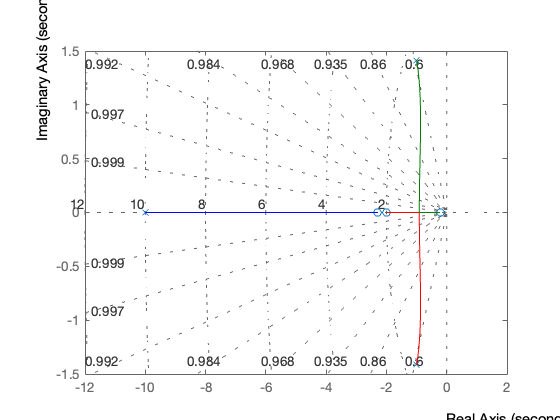

In [30]:
rlocus(G*H),sgrid

#### Open-loop frequency response

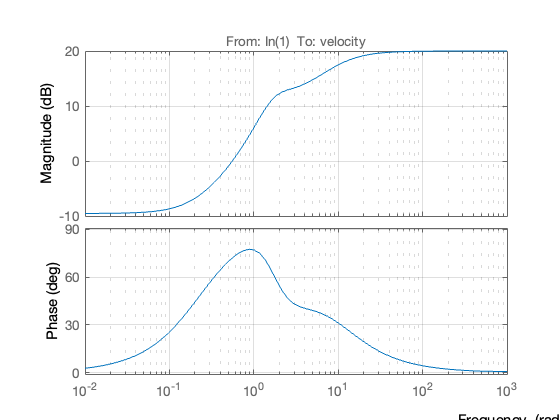

In [31]:
bode(G*H),grid

#### Closed-loop step response

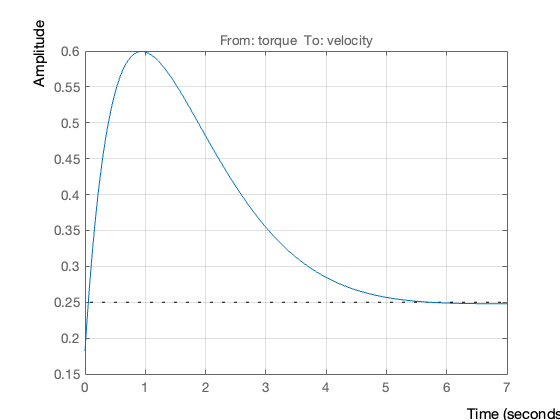

In [32]:
step(Gc),grid

#### Closed-loop frequency response

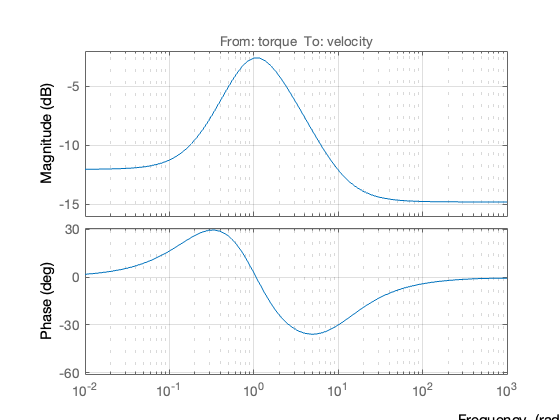

In [33]:
bode(Gc),grid

#### Closed-loop impulse response

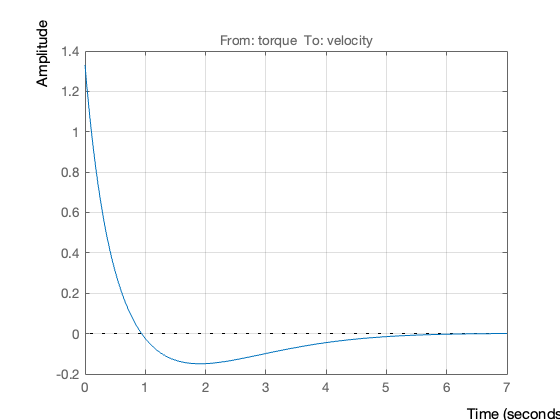

In [34]:
impulse(Gc),grid

#### Nyquist diagram

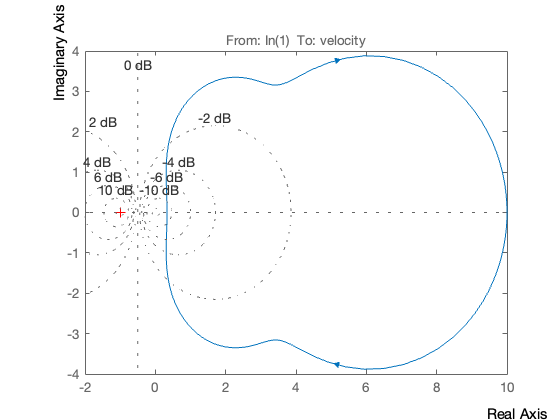

In [35]:
nyquist(G*H),grid

MATLAB also provides two interactive graphical tools that work with LTI system objects

* `ltiview` is a graphical tool that can be used to analyze systems defined by LTI objects. It provides easy access to LTI objects and time and frequency response analysis tools. 
* `rltool` is an interactive tool for designing controllers using the root locus method.

Control engineers will find `sisotool` useful.

You are encouraged to experiment with these tools.

### Partial Fraction Expansions

MATLAB provides a command called `residue` that returns the partial fraction expansion of a transfer function. That is, given

$$G(s)= \frac{s^m +b_{m-1}s^{m-1} + \cdots + b_1s+b_0}{s^n +a_{n-1}s^{n-1} + \cdots a_1s+a_0}$$

it returns

$$\frac{r_1}{s + p_1} + \frac{r_2}{s + p_2} + \cdots + \frac{R_n}{s + p_n} + K(s)$$

where $p_k$ are the poles of the transfer function, $r_k$ are the coefficients of the partial fraction terms (called the **residues of the poles**) and $K(s)$ is a remainder polynomial which empty unless the rational polynomial is *non-proper*.

To use this, the starting point must be the expanded form of the transfer function in numerical polynomial form.

Thus given

$$C(s) = \frac{5(s + 2)}{s(s+3)(s+10)}$$

we obtain the partial fraction expansion using the MATLAB command sequence:

In [36]:
k = 5; z = [-2]; p = [0; -3; -10]; % zero-pole-gain form
C = zpk(z,p,k);
[num,den] = tfdata(C,'v')
%
% (Note that the leading terms in num are zero).

num =
     0     0     5    10


den =
     1    13    30     0


In [37]:
[r,p,k] = residue(num,den)

r =
   -0.5714
    0.2381
    0.3333


p =
   -10
    -3
     0


k =
     []


which we interpret to mean

$$C(s) = \frac{0.3333}{s} + \frac{0.2381}{s + 3} - \frac{0.5714}{s + 5}.$$

If $C(s)$ represents the step response of the system

$$G(s) = \frac{5(s + 2)}{(s + 3)(s + 10)}$$

then the step response is, by inverse Laplace Transform:

$$y(t) = \left( {0.3333 + 0.2381{e^{ - 3t}} - 0.5714{e^{ - 10t}}}
\right){u_0}(t).$$

You can check this with the commands:


newC =


     5 s + 10


  ---------------


  s^2 + 13 s + 30


Continuous-time transfer function.


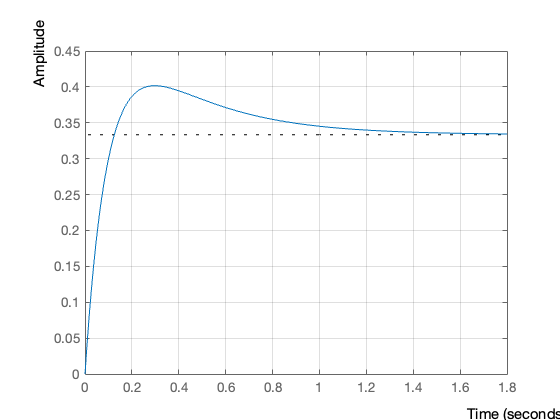

In [38]:
newC = tf([5, 10],[1, 13, 30])
step(newC),grid % provides $u_0(t)$

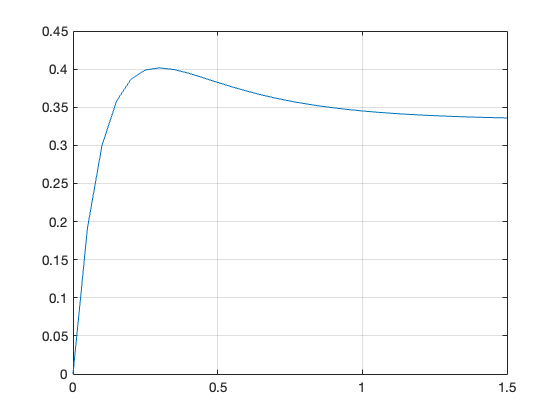

In [39]:
t = 0:.05:1.5; % time vector
c = 0.3333 + 0.2381 * exp(-3*t) - 0.5714 * exp(-10*t);
plot(t,c),grid

Completing the problem using the Symbolic toolbox is left as an exercise for the reader.

There are numerous other documentation features provided for LTI system objects. Please consult the [on-line help](https://uk.mathworks.com/help/control/getstart/linear-lti-models.html) for full details.

(simulink_tf)=
## Using Transfer Functions in Simulink for System Simulation

The Simulink transfer function (**`Transfer Fcn`**) block (see {numref}`fig:sim_tf`) implements a transfer function

:::{figure-md} fig:sim_tf
<img src="pictures/sim_tf.png" alt="The LTI Block in Simulink">

The LTI Block in Simulink
:::

The transfer function block represents a general input output function

$$G(s) = \frac{N(s)}{D(s)}$$

and is not specific nor restricted to circuit analysis.

It can, however be used in modelling and simulation studies.

(examples15)=
## Examples 15

(ex:15.1)=
### Example 15.1 

`````{admonition} MATLAB Example
:class: tip
We will solve this examples by hand and then review the solution in MATLAB lab 5.
`````

Recast {ref}`ex:14.2` as a MATLAB problem using the LTI Transfer Function block. 

For simplicity use parameters $R_1 = R_2 = R_3 = 1\; \Omega$, and $C_1 = C_2 = 1$ F.

Calculate the step response using the LTI functions and 

Verify the result with Simulink.

#### MATLAB Solution
From a previous analysis ({ref}`ex:14.2`) the transfer function is:

$$G(s) = \frac{V_\mathrm{out}}{V_\mathrm{in}} = \frac{-1}{R_1\left[(1/R_1 + 1/R_2 + 1/R_3 + sC_1)(sR_3C_2) + 1/R_2\right]}$$

so substituting the component values we get:

$$G(s) = \frac{V_{\mathrm{out}}}{V_{\mathrm{in}}} = \frac{-1}{s^2 + 3s + 1}$$

We can find the step response by letting $v_{\mathrm{in}}(t) = u_0(t)$ so that
$V_{\mathrm{in}}(s)=1/s$ then 

$$V_{\mathrm{out}}(s) = \frac{-1}{s^2 + 3s + 1}.\frac{1}{s}$$

We can solve this by partial fraction expansion and inverse Laplace transform
as is done in the text book with the help of MATLAB's `residue` function.

Here, however we'll use the LTI block.

Define the circuit as a transfer function

In [40]:
G = tf([-1],[1 3 1])


G =


       -1


  -------------


  s^2 + 3 s + 1


Continuous-time transfer function.


step response is then:

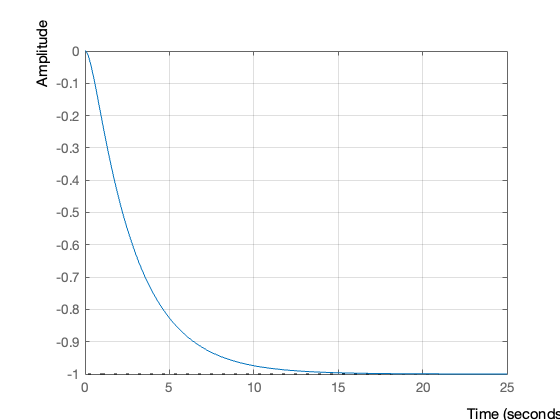

In [41]:
step(G),grid

#### Live Script Solution

A standalone script version of this solution is available as [example15_1.mlx](https://cpjobling.github.io/eg-150-textbook/laplace_transform/matlab/example15_1.mlx)

#### Simulink model

See [example_15_1.slx](https://cpjobling.github.io/eg-150-textbook/laplace_transform/matlab/example_15_1.slx)

In [42]:
open example_15_1

![Simulink model](pictures/ex8_sim.png)

Result

![Simulation result](pictures/ex8_sim_result.png)

Let's go a bit further by finding the frequency response:

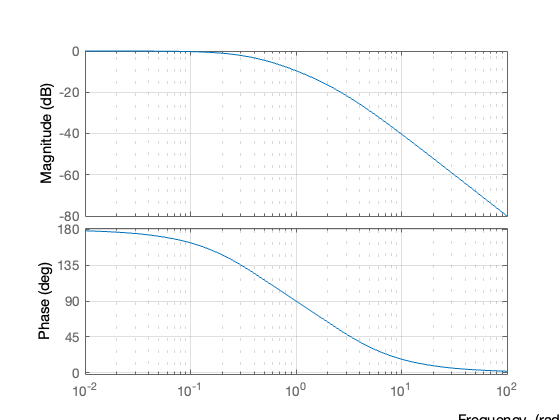

In [43]:
bode(G),grid

```{note}
The following examples have been adapted from *Session 3: RC Networks and the Op-Amp in the Time-Domain*, from **EG-152 Analogue Design** ({cite}`eg152`).
```

(ex15.2)=
### Example 15.2: Periodic Excitation

Consider the RC circuit shown in {numref}`fig:ex15.2`(b). The circuit is subjected to the periodic signal $x(t) = v_1(t)$ shown in {numref}`fig:ex15.2`(a).

:::{figure-md} fig:ex15.2
<img src="pictures/eg-152-3.1.png" alt="Circuit for Investigating Recurrent Boundary Conditions." width="80%">

Circuit for Investigating Recurrent Boundary Conditions (Figure 3.0 of {cite}`eg152`)
:::

a) Use the Laplace transform to determine the transfer function $H(s)$ and the impulse response $h(t)$ of the RC circuit.

b) Determine the step response of the RC circuit.

c) Use the results of Example 15.2(a) and (b) and properties of the Laplace transform to determine the response $y(t) = v_2(t)$ to $v_1(t)$. 

d) Given that $V_L = -5$ V and $V_U = 5$ V, and assuming that the time constant $\tau = RC = T_A = 2 T_B$,  use MATLAB to plot the response $v_1(t)$ over two cycles of the input signal. Use any suitable values of $RC$ that you feel are appropriate.

e) Use the transfer function block and the signal editor provided by Simulink to confirm by simulation the response computed in Example 15.2(d).

(15.3)=
### Example 15.3: Operational Differentiator

In Section 3.3 of {cite}`eg152` it is given that the differential equation of the *operational differentiator* illustrated in {numref}`fig:15.3` is

$$v_2(t) = -R i(t) = -RC \frac{d}{dt}v_1(t)$$

:::{figure-md} fig:15.3
<img src="pictures/eg-152-3.4.png" alt="Schematic of Operational Differentiator." width="60%">

Schematic of Operational Differentiator (Figure 3.4 of {cite}`eg152`)

:::



a) Give the transfer function $H(s) = V_2(s)/V_1(s)$ of the operational differentiator.

b) Compute the impulse and step response of the operational differentiator.

c) Compute and plot the response of the operational differentiator to three cycles of the input of {numref}`fig:ex12.2`(a) when $V_L = -6$ V, $V_U = 3$ V, given that the waveform period $T = 1$ ms, the duty cycle $D = T_A/(T_A + T_B) = 2/5$ and time constant $\tau = RC = 50$ ms.

(15.4)=
### Example 15.4: Operational Integrator

In Section 3.5 of {cite}`eg152` it is given that the differential equation of the *operational inetgrator* illustrated in {numref}`fig:15.4` is

$$v_2(t) = -\frac{1}{RC} \int_0^t v_1(\tau)\, d\tau.$$

:::{figure-md} fig:15.4
<img src="pictures/eg-152-3.7.png" alt="Schematic of Operational Integrator." width="60%">

Schematic of Operational Integrator (Figure 3.7 of {cite}`eg152`)

:::



a) Give the transfer function $H(s) = V_2(s)/V_1(s)$ of the operational interator.

b) Compute the impulse and step response of the operational integrator.

c) Compute and plot the response of the operational differentiator to three cycles of the input of {numref}`fig:ex12.2`(a) when $V_L = -3$ V, $V_U = 6$ V given that the waveform period $T = 5$ ms, the duty cycle $D = T_A/(T_A + T_B) = 1/3$ and time constant $\tau = RC = 200$ ms.

## Lab 5

In Lab 5 we will have the opportunity to explore some of the features discussed in this class.

## Summary

In this section we have explored the various methods that we can use the computer to solve Laplace transform problems for which the system is cast as a transfer function. We have covered the following topics:

* {ref}`circ_tf`
* {ref}`matlab_tf`
* {ref}`simulink_tf`
* {ref}`examples15`


### Takeaways

In MATLAB the rational polynomials that represent the transfer functions of continuous-time LTI systems can be defined numerically or symbolicly (see {ref}`matlab_tf`). There are two forms of numerical representation. The first of these uses the expanded polynomials (called *transfer function*), the second uses the factors (called *zero-pole-gain* form). The Control Systems Toolbox in MATLAB provides an object called the LTI block which supports both forms (and a third form, called *state-space*, not studied here, which is used in filter design and advanced control systems).

The MATLAB commands discussed in this section are summarized in the table given below.

#### Quick Reference to MATLAB objects and functions

| Name | Purpose | Usage | Reference | Notes |
|:------|:---------|:-------|:-----------|:-------|
| `sym2poly` | Converts a symbolic polynomial to a numerical polynomial | `p = sym2poly(x^2 + 2*x + 4)` | [sym2poly](https://uk.mathworks.com/help/symbolic/sym.sym2poly.html) |Coefficents of the symbolic polynomial must be numbers |
| `poly2sym` | Converts a numerical polynomial to a symbolic polynomial | `ps = poly2sym([1,2,4],'s')` | [poly2sym](https://uk.mathworks.com/help/symbolic/sym.poly2sym.html) | - |
| `numden` | Extracts numerator and denominator from a rational polynomial expressed in symbolic form |  `[n,d] = numden((s + 1)/(s^2 + 2*s * 3'))` | [numden](https://uk.mathworks.com/help/symbolic/sym.numden.html) | - |
| | Numerical LTI object which represents a continuous-time or discrete-time LTI system |  | [Numeric Linear Time Invariant (LTI) Models](https://uk.mathworks.com/help/control/ug/numeric-models.html) | - |
| `zpk` | Numerical LTI object representing a transfer function model in zero-pole-gain (factorized) form | `G = zpk(z,p,k)` | [zpk](https://uk.mathworks.com/help/control/ref/zpk.html) | - |
| `tf` | Numerical LTI object representing a transfer function model in polynomial form | `G = tf(num,den)` | [tf](https://uk.mathworks.com/help/control/ref/tf.html) | - |
| `tfdata` | Data extraction function that returns the numerator and denominator polynomials from an LTI model | `[num,den] = tfdata(H,'v')` | [tfdata](https://uk.mathworks.com/help/ident/ref/dynamicsystem.tfdata.html) | - |
| `zpkdata` | Data extraction function that returns the *zeros*, *poles* and *gain* from an LTI model | `[z,p,k]=zpkdata(H,'v')` | [zpkdata](https://uk.mathworks.com/help/ident/ref/dynamicsystem.zpkdata.html) | - |
| `set`, `get` | Set and retrieve properties of LTI system objects | See {ref}`lti:props` | [set](https://uk.mathworks.com/help/ident/ref/inputoutputmodel.set.html), [get](https://uk.mathworks.com/help/ident/ref/inputoutputmodel.get.html) | Useful for documenting your work |
| `feedback` | Connect two LTI objects in a feedback connention | `GH = feedback(G,H)` | [feedback](https://uk.mathworks.com/help/control/ref/inputoutputmodel.feedback.html) | Default assumes negative feedback so `feedback(G,H)` is equivalent to `feedback(G,H,-1)`. For series connection of LTI systems the multiplication operator can be used `H = H1*H2`. For parallel connection the addition operator can be used `H = H1 + H2`. There are also functions `series` and `parallel` that can be used if preferred.  | 
| `impulse` | Computes and plots the impulse response of an LTI system | `impulse(H)` | [impulse](https://uk.mathworks.com/help/ident/ref/dynamicsystem.impulse.html) | Works for both continuous-time and discrete-time systems. |
| `step` | Computes and plots the step response of an LTI system | `step(G)` | [step](https://uk.mathworks.com/help/ident/ref/dynamicsystem.step.html) | Works for both continuous-time and discrete-time systems. |
| `nyquist` | Computes and plots the Nyquist diagram for an LTI system | `nyquist(H)` | [nyquist](https://uk.mathworks.com/help/ident/ref/dynamicsystem.nyquist.html) | Nyquist plots are used in Control systems analysis and design |
| `bode` | Computes and plots a Bode diagram for an LTI system | `bode(H)` | [bode](https://uk.mathworks.com/help/ident/ref/dynamicsystem.bode.html) | Bode plots present the frequency response of a system using a combined plot of maginutude (in DB) and phase (in degrees) plotted against log radian frequency. |
| `rlocus` | Computes and plots the root locus of an open-loop system | `rlocus(H)` | [rlocus](https://uk.mathworks.com/help/control/ref/dynamicsystem.rlocus.html) | Root locus diagrams shows the movement of the closed-loop poles of a feedback system when some parameter, usually gain, is changed. They are used in control system analysis and design. |
| `residue` | Computes the residues of a partial fraction expansion of a numrical rational polynomial | `[r,p,k] = residue(num,den)` | [residue](https://uk.mathworks.com/help/matlab/ref/residue.html) | `r` is the list of residues, `p` is the list of poles, `k` is the remainder which will be the empty matrix unless the polynomial is non proper. When there are repeated roots, the residues are presented in order of the repitition. I.e. for $1/(s + 1)^3$, `r(1)` will be for the factor $1/(s + 1)$, `r(2)` for the factor $1/(s + 1)^2$ and `r(3)` for the factor $1/(s + 1)^3$. |
| `factor` | Computes the factors of a symbolic polynomial | `fact(s^2 + 2*s + 4)` | [factor](https://uk.mathworks.com/help/symbolic/factor.html) | This function can also find prime factors or numbers.  |
| `expand` | Expands a factorised polynomial | `q = expand((s + 1 + 2*j)*(s + 1 -2 *j)` | [expand](https://uk.mathworks.com/help/symbolic/sym.expand.html) | This function is useful for converting systems that have pairs of complex poles into quadratic factors |
|`lsim` | Plots simulated time response of dynamic system to arbitrary inputs | `lsim(H,t,x)` | [lsim](https://uk.mathworks.com/help/control/ref/dynamicsystem.lsim.html?searchHighlight=lsim&s_tid=srchtitle_lsim_1) | `t` is time vector; `x` is the system input $x(t)$ and is an arbitrary function. |

## Next time

We will complete this course with an introduction to Frequency response analysis of periodic signals via the Fourier series.

* {ref}`unit5`

## References

```{bibliography}
:filter: docname in docnames
```

## Matlab Solutions

For convenience, single script MATLAB solutions to the examples are provided and can be downloaded from the accompanying [MATLAB](https://github.com/cpjobling/eg-150-textbook/tree/master/laplace_transform/matlab) folder.

* {ref}`ex:15.1` [example15.1.mlx](https://cpjobling.github.io/eg-150-textbook/laplace_transform/matlab/example15_1.mlx)
* {ref}`ex:15.2` [example15.2.mlx](https://cpjobling.github.io/eg-150-textbook/laplace_transform/matlab/example15_2.mlx)